# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries


In [42]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


## Get the Data

In [76]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('movie.data', sep='\t', names= column_names)
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [77]:
mov_titles = pd.read_csv('Movie_Id_Titles')
print(mov_titles.shape)
mov_titles.head()

(1682, 2)


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [78]:
df = pd.merge(data, mov_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [79]:
df.shape

(100003, 5)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


## Visualization Imports

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

creating a ratings dataframe with average rating and number of rating

In [82]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

The above movies have high ratings (i.e, 5.0 out of 5)

In [83]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

Star Wars have the highent rating counts

In [84]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [85]:
ratings['no_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(10)

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [86]:
ratings.sort_values(by='no_of_ratings',ascending=False).head()

,rating,no_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


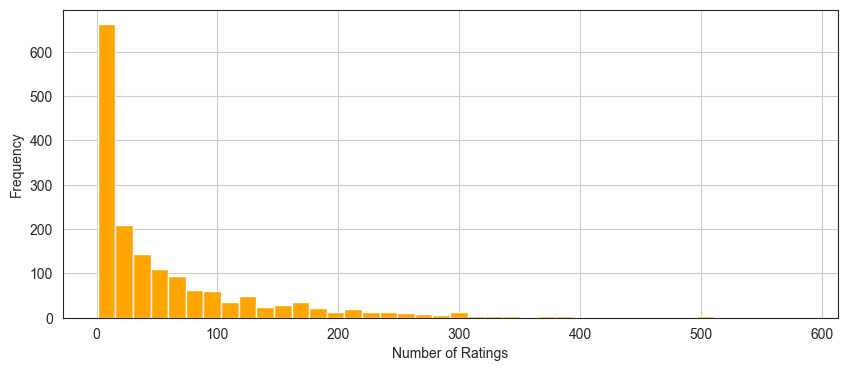

In [87]:
plt.figure(figsize=(10, 4))
ratings['no_of_ratings'].hist(bins=40,color='orange')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


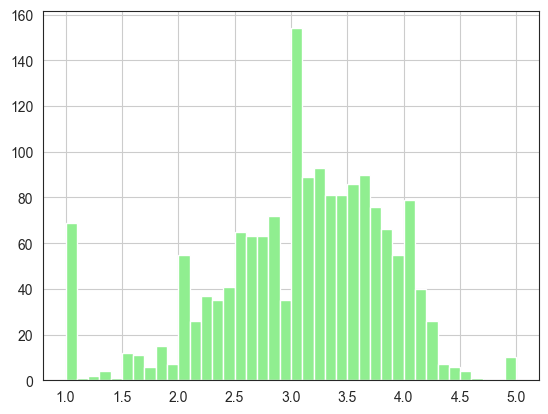

In [88]:
ratings['rating'].hist(bins=40,color='lightgreen')
plt.show()

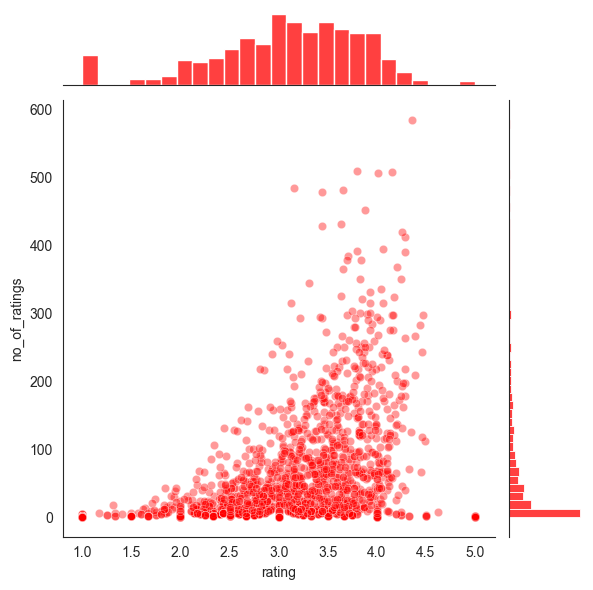

In [89]:
sns.jointplot(x='rating', y='no_of_ratings', data=ratings, alpha=0.4, color='red')
plt.show()

## Recommending Similar Movies

Creating a matrix where rows represent user IDs, columns represent movie titles, and the cells contain the ratings given by users to the respective movies. Since not every user has rated every movie, many entries in the matrix will be NaN (Not a Number) to represent missing or unrated values.

In [90]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
ratings.sort_values('no_of_ratings',ascending=False).head(10)

,rating,no_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Now let's grab the user ratings for those two movies:

In [92]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [93]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [94]:
similar_to_starwars.sort_values(ascending=False).head()

title
Hollow Reed (1996)                   1.0
Stripes (1981)                       1.0
Star Wars (1977)                     1.0
Man of the Year (1995)               1.0
Beans of Egypt, Maine, The (1994)    1.0
dtype: float64

In [95]:
similar_to_starwars.sort_values(ascending=False).tail()

title
Wonderland (1997)                         NaN
Wooden Man's Bride, The (Wu Kui) (1994)   NaN
Yankee Zulu (1994)                        NaN
You So Crazy (1994)                       NaN
Á köldum klaka (Cold Fever) (1994)        NaN
dtype: float64

Let's clean this by removing NaN values and using a DataFrame insted of series

In [96]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier)

In [97]:
ratings.head()

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [98]:
corr_starwars = corr_starwars.join(ratings['no_of_ratings'])
corr_starwars.head()

,Correlation,no_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [99]:
corr_starwars[corr_starwars['no_of_ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,no_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for the comedy Liar Liar:

In [100]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['no_of_ratings'])
corr_liarliar[corr_liarliar['no_of_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [101]:
all_movies=mov_titles['title'].to_list()
print(all_movies)

['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shorty (1995)', 'Copycat (1995)', 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 'Twelve Monkeys (1995)', 'Babe (1995)', 'Dead Man Walking (1995)', 'Richard III (1995)', 'Seven (Se7en) (1995)', 'Usual Suspects, The (1995)', 'Mighty Aphrodite (1995)', 'Postino, Il (1994)', "Mr. Holland's Opus (1995)", 'French Twist (Gazon maudit) (1995)', 'From Dusk Till Dawn (1996)', 'White Balloon, The (1995)', "Antonia's Line (1995)", 'Angels and Insects (1995)', 'Muppet Treasure Island (1996)', 'Braveheart (1995)', 'Taxi Driver (1976)', 'Rumble in the Bronx (1995)', 'Birdcage, The (1996)', 'Brothers McMullen, The (1995)', 'Bad Boys (1995)', 'Apollo 13 (1995)', 'Batman Forever (1995)', 'Belle de jour (1967)', 'Crimson Tide (1995)', 'Crumb (1994)', 'Desperado (1995)', 'Doom Generation, The (1995)', 'Free Willy 2: The Adventure Home (1995)', 'Mad Love (1995)', 'Nadja (1994)', 'Net, The (1995)', 'Strange Days (1995)', 'To Wong F

# Movie Recommender 

In [102]:
def mov_recommender(movie, threshold=100):
    movie_ratings = moviemat[movie]
    similar_movies = moviemat.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar_movies, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie[ratings['no_of_ratings'] > threshold].sort_values('Correlation', ascending=False)
    corr_movie = corr_movie.drop(columns=['Correlation'])
    return corr_movie

In [103]:
movie_input = input('Enter a movie name: ')
recommended_movies = mov_recommender(movie_input)
print(f'Recommended Top 10 Movies:')
recommended_movies.head(10)

Enter a movie name: Postino, Il (1994)
Recommended Top 10 Movies:


""
title
"Postino, Il (1994)"
Kolya (1996)
Grease (1978)
In the Name of the Father (1993)
What's Eating Gilbert Grape (1993)
"Deer Hunter, The (1978)"
Interview with the Vampire (1994)
"English Patient, The (1996)"
Swingers (1996)
